In [1]:
from sklearn import datasets

data_breast_cancer = datasets.load_breast_cancer()

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = data_breast_cancer.data[:, [3, 4]]
y = data_breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC 

svm_clf = LinearSVC(loss='hinge', dual=True, random_state=42)

svm_clf.fit(X_train, y_train)

accuracy_train_standard = accuracy_score(y_train, svm_clf.predict(X_train))
accuracy_test_standard = accuracy_score(y_test, svm_clf.predict(X_test))

print(accuracy_train_standard, accuracy_test_standard)

0.6285714285714286 0.6228070175438597


/Users/bartlomiejwozniczka/Desktop/MachineLearning/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [4]:
svm_clf_pipeline = Pipeline([("scaler", StandardScaler()),
                   ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42, dual=True))])

svm_clf_pipeline.fit(X_train, y_train)

accuracy_train_pipline = accuracy_score(y_train, svm_clf_pipeline.predict(X_train))
accuracy_test_pipeline = accuracy_score(y_test, svm_clf_pipeline.predict(X_test))
print(accuracy_train_pipline,accuracy_test_pipeline)

0.8923076923076924 0.9298245614035088


In [5]:
import pickle

results = [accuracy_train_standard,accuracy_test_standard, accuracy_train_pipline,accuracy_test_pipeline]

with open("bc_acc.pkl", "wb") as file:
    pickle.dump(results, file)

In [6]:
import numpy as np

data_iris = datasets.load_iris()
X = data_iris.data[:,(2,3)]
y = (data_iris["target"] == 2).astype(np.int8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
svm_clf= LinearSVC(loss='hinge', dual=True, random_state=42)

svm_clf.fit(X_train, y_train)

accuracy_train_standard_i = accuracy_score(y_train, svm_clf.predict(X_train))
accuracy_test_standard_i = accuracy_score(y_test, svm_clf.predict(X_test))

print(accuracy_train_standard_i, accuracy_test_standard_i)

0.9416666666666667 1.0


/Users/bartlomiejwozniczka/Desktop/MachineLearning/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
svm_clf_pipeline_i = Pipeline([("scaler", StandardScaler()),
                   ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42, dual=True))])

svm_clf_pipeline_i.fit(X_train, y_train)

accuracy_train_pipline_i = accuracy_score(y_train, svm_clf_pipeline_i.predict(X_train))
accuracy_test_pipeline_i = accuracy_score(y_test, svm_clf_pipeline_i.predict(X_test))
print(accuracy_train_pipline_i,accuracy_test_pipeline_i)
# print(svm_clf_pipeline.predict([[5.5,1.7],
#                                [4.5,1.7]]))

0.9416666666666667 1.0


In [9]:
results_2 = [accuracy_train_standard_i,accuracy_test_standard_i, accuracy_train_pipline_i,accuracy_test_pipeline_i]

with open("iris_acc.pkl", "wb") as file:
    pickle.dump(results_2, file)

<Axes: xlabel='x', ylabel='y'>

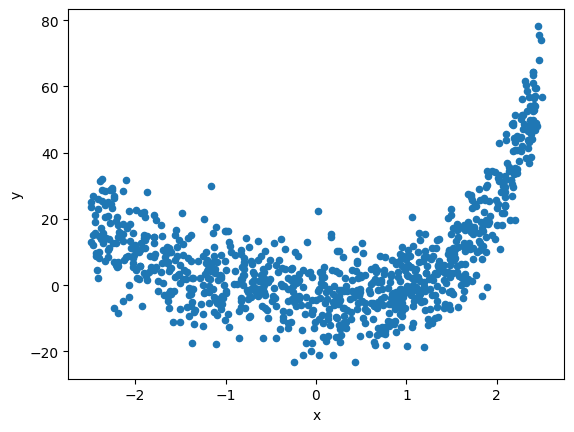

In [10]:
import pandas as pd

size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'], test_size=0.2, random_state=42)


In [12]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

polynomial_svm_clf = Pipeline([('poly_features', PolynomialFeatures(degree=4, include_bias=False)),
                               ('scaler', StandardScaler()),
                               ('regressor', LinearSVR(dual=True, random_state=42))])

polynomial_svm_clf.fit(X_train, y_train)

y_train_pred = polynomial_svm_clf.predict(X_train)
y_test_pred = polynomial_svm_clf.predict(X_test)

mse_lg_train = mean_squared_error(y_train, y_train_pred)
mse_lg_test = mean_squared_error(y_test, y_test_pred)

print(mse_lg_train, mse_lg_test)

62.60953991810254 73.43369070772673


In [13]:
from sklearn.svm import SVR

svr_poly_4 = SVR(kernel='poly', degree=4)

svr_poly_4.fit(X_train, y_train)

y_train_pred = svr_poly_4.predict(X_train)
y_test_pred = svr_poly_4.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(mse_train, mse_test)


104.67264330105016 161.47688568844632


In [14]:
X = X.reshape(-1, 1)

param_grid = {
    'C': [0.1, 1, 10],
    'coef0': [0.1, 1, 10]
}

search_grid = GridSearchCV(svr_poly_4, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

search_grid.fit(X, y)

print(search_grid.best_params_)

{'C': 10, 'coef0': 1}


In [15]:
svr_poly_4 = SVR(kernel='poly', degree=4, C=10, coef0=1)

svr_poly_4.fit(X_train, y_train)

y_train_pred = svr_poly_4.predict(X_train)
y_test_pred = svr_poly_4.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(mse_train, mse_test)

61.942754913934884 71.95203462064309


In [16]:
results_3 = [mse_lg_train, mse_lg_test, mse_train, mse_test]

In [17]:
with open("reg_mse.pkl", "wb") as file:
    pickle.dump(results_3, file)